# Ansible Introduction and Lab  

# What is Configuration Management  

* Configuration management is the name given to the general process of managing a changing software system    
* The aim of configuration management is to support the system integration process so that all developers can access the project code and documents in a controlled way, find out what changes have been made, and compile and link components to create a system  

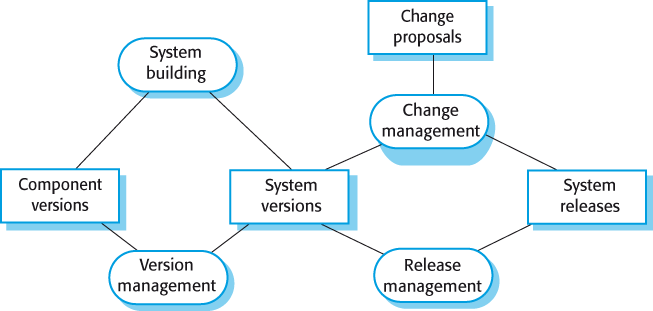  

# What is Configuration Management  

* CI/CD (Continuous Integration/Continuous Delivery) has been adopted by many organizations that provide cloud services (that is, SaaS, PaaS, and so on). For instance, CD can include cloud infrastructure provisioning and deployment, which traditionally have been done manually (using scripts) and consist of multiple stages (some even manual!)  
* The main goal of the CI/CD processes is to be fully automated, with each run fully logged and visible to the entire team  
* CI/CD allows the bits and pieces of a microservices-based application to evolve and mature individually, reducing blockers. The CI/CD pipeline involves continuous integration, continuous delivery, and continuous deployment  
* Cloud-native companies adopted a fairly extreme approach (compared with what was typical at that time) of continuously improving their online services by having a fully automated process for building, testing, and deploying new code

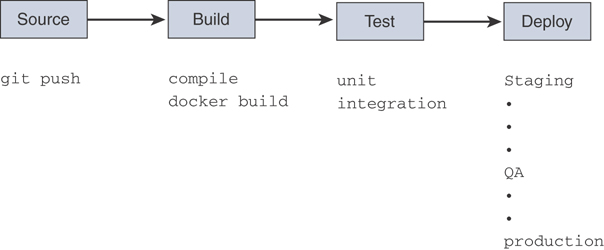  

Notes ([reference](https://learning.oreilly.com/library/view/ccnp-and-ccie/9780135971802/ch09.xhtml) | [image](https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9780135971802/files/graphics/09fig10.jpg)):  

The pipeline run is triggered by a source code repository (Git in this example). The code change typically sends a notification to a CI/CD tool, which runs the corresponding pipeline. Other notifications include automatically scheduled or user-initiated workflows, as well as results of other pipelines.  

The Build stage includes the compilation of programs written in languages such as Java, C/C++, and Go. On the contrary, Ruby, Python and JavaScript programs work without this step; however, they could be deployed using Docker and other container technologies. Regardless of the language, cloud-native software is typically deployed with containers (in a microservice environment).  

In the Test stage, automated tests are run to validate the code and the application behavior. The Test stage is an important stage, since it acts as a “safety net” to prevent easily reproducible bugs from being introduced. This concept can be applied to preventing security vulnerabilities, since at the end of the day, a security vulnerability is typically a software (or hardware) bug. The responsibility of writing test scripts can fall to a developer or a dedicated QA engineer. However, it is best done while new code is being written.  

Depending on the size and complexity of the project, the Test phase can last from seconds to hours. Many organizations with large-scale projects run tests in multiple stages, starting with tests (typically called “smoke tests”) that perform quick sanity checks from the user’s point of view. Large-scale tests are typically parallelized to reduce runtime. It’s very important that the test stage produce feedback to developers quickly, while the code is still fresh in their minds and they can maintain the state of flow.  

Once you have a built your code and passed all predefined tests, you are ready to deploy it (the Deploy stage). Traditionally, there have been multiple deploy environments used by engineers (for example, a “beta” or “staging” environment used internally by the product team and a “production” environment).  

# Automation Landscape  

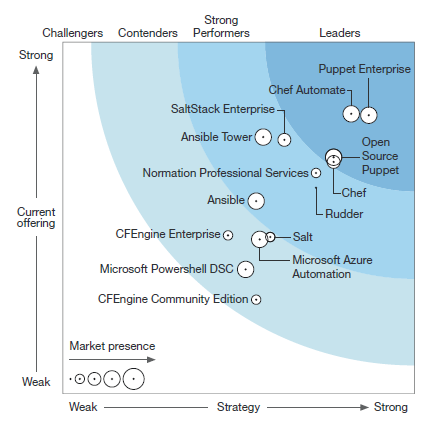  
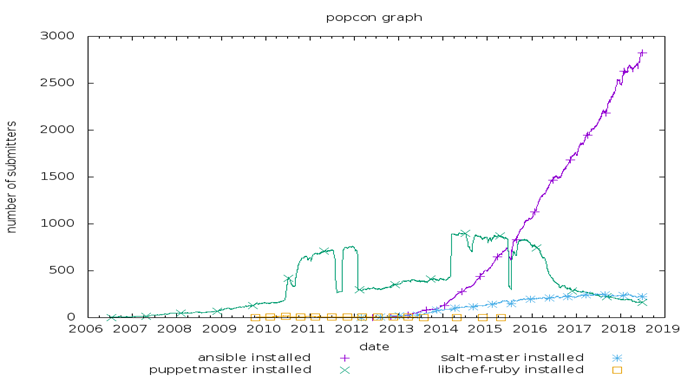  

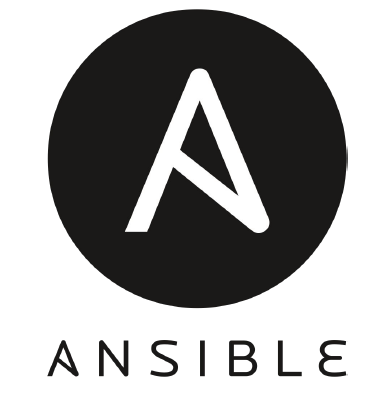  

# Ansible  

* Ansible is an open-source IT automation tool that automates:  
  * Application deployment  
  * Cloud provisioning  
  * Configuration management  
  
* Created by Michael DeHaan in 2012, it is written in Python and Powershell

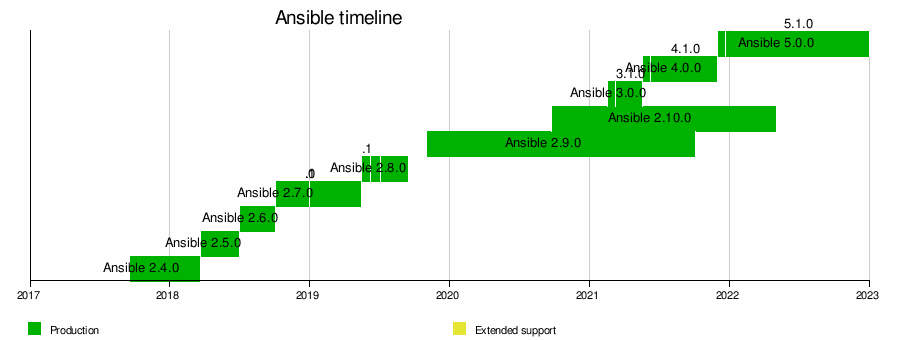  
Source: Wikipedia

# Ansible  

* Ansible is a configuration management tool that automates the configuration of multiple servers/networks/clouds by the use of Ansible playbooks  
* **Playbooks** are Ansible configuration, deployment and orchestration language, written in YAML   
  * [Sample Notebooks](https://github.com/ansible/ansible-examples)  
* Ansible **inventory** file defines the hosts and groups of hosts upon which commands, modules, and tasks in a playbook operate  
* **Agentless**: No client / server concept  
  * No client installed on the managed nodes  
  * SSH as protocol to push changes & gather facts from a single source to multiple remote resources
* **Simple to setup**:  
  * Python 3.8 + on control machine
  * Python 2.6 + on controlled nodes
  * Installation (control machine only):  
    * pip install ansible [All OSs]  
    * apt-get install ansible [Debian | Ubuntu]  
    * yum install ansible-core [RedHat | CentOS]  
* **Declarative**: playbook does not require any knowledge of the current state of the server, only its desirable state
* **Idempotent**: Running the same "playbook" multiple times producces the same output/configuraiton


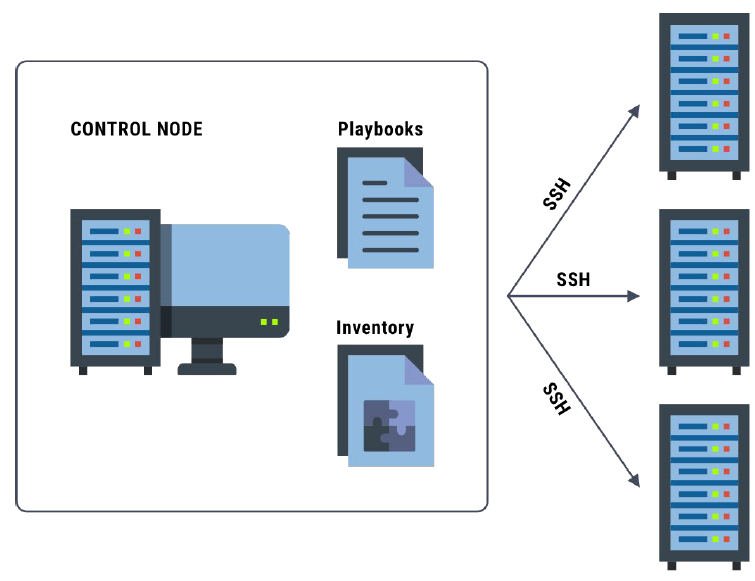  

# Configuring SSH to Manage Hosts (OPTIONAL STEP)  

* ssh-keygen is used to generate private and public keys on the control node  
* Send public key to the ~/.ssh/authorized_keys file in the target node user home directory  
  * ssh-copy-id user@remotehost  
  
  
* Exercise:  

1. Generate a private/public key-pair using ssh-keygen  
2. SSH into a remote Linux server and propagate your public key to ~/.ssh/authorized_keys
3. Try to SSH and check that no password is required  
  


# Inventory File  

* Default format is INI-like file, also supports YAML    
* Default location is /etc/ansible/hosts
```
[webservers]
web1.example.com
web2.example.com
[dbservers]
db1.example.com
db2.example.com
[servers:children]
webservers
dbservers
```  

* Exercise:

1. Create a file named "hosts" in a local directory with this content:  

```
mail.example.com # ungrouped host
[webservers] # webservers group
foo.example.com
bar.example.com
www[01:05].example.com
[dbservers] # dbservers group
one.example.com
two.example.com
three.example.com
db-[a:f].example.com
[local]
localhost
```  
2. Run:  

> ansible --list-hosts all -i hosts  

3. Run:  

> ansible --list-hosts webservers -i hosts  

4. Run:  

> ansible --list-hosts dbservers -i hosts

# Ansible Command Set  

[Commad-Line Tools](https://docs.ansible.com/ansible/latest/user_guide/command_line_tools.html): 

* **ansible**: The main Ansible command to run ad-hoc commands on remote nodes  
* **ansible-playbook**: Command to run playbooks  
* **ansible-pull**: The main Ansible pull command  
* **ansible-doc**: Ansible documentation program  
* **ansible-galaxy**: Ansible Galaxy interaction program  
* **ansible-vault**: The Ansible password vault  
* **ansible-inventory**: Display or dump the inventory  
* **ansible-console**: The Ansible interactive console against a chosen inventory  
* **ansible-config**: View, edit and manage configuration  

# Ansible Ad-Hoc Commands  

> ansible all -m shell -i hosts -a env  
> ansible webservers -m shell -i hosts -a env  
> ansible local -m shell -i hosts -a env  
> ansible local -m shell -i hosts -a "df -h"  

* -m select an Ansible [module](https://docs.ansible.com/ansible/latest/user_guide/modules_intro.html) to run the command against  
* -a provides options to the selected module  

* For example, create a directory:  

```
ansible local -i hosts -m ansible.builtin.file -a "path=/tmp/testfile1 state=touch mode=700"
```

* Ad-hoc commands map to individual tasks on a Playbook:  

Create file myplaybook.yml:  
```
---
- hosts: localhost
  tasks:
    - name: create testfile1
      ansible.builtin.file:
        path: /tmp/testfile2
        state: touch
        mode: 700
```  

Now, run the playbook:  

```
ansible-playbook -i hosts myplaybook.yml
```

Make sure both files are created:  

```
ls -l /tmp/testfile*
```   



## Ad-Hoc Commands Examples  

* Transfer a file directly to multiple servers  
> ansible -i hosts local -m copy -a "src=/etc/hosts dest=/tmp/hosts"  

* Change ownership and permissions on files  
> ansible -i hosts local -m file -a "dest=/ansible/a.txt mode=600 owner=instructor group=instructor"  

* Delete directories (recursively) and delete files  
> ansible -i hosts local -m file -a "dest=/path/to/dir state=absent"

* Ensure a package is installed, but don’t update it  
> ansible -i hosts local -m apt -a "name=acme state=present"  

* Ensure a package is at the latest version  
> ansible -i hosts local -m apt -a "name=acme state=latest"  

* Ensure a package is not installed  
> ansible -i hosts local -m apt -a "name=acme state=absent"  

* Create or manipulate an existing user account  
> ansible all -m user -a "name=student password=\<crypted password here\>"  
    
* Gather discovered vars about remote hosts  
> ansible all -m setup  

* Ensure a service is started on all web servers  
> ansible -i hosts webservers -m service -a "name=httpd state=started"  

* Restart a service on all web servers  
> ansible webservers -m service -a "name=httpd state=restarted"  

* Ensure a service is stopped  
> ansible webservers -m service -a "name=httpd state=stopped"
    
 



# Ansible Configuration  

* ansible-config [dump|list|view] [--help] [options] [ansible.cfg]  
* Changes can be made and used in a configuration file which will be searched for in the following order:  
  * ANSIBLE_CONFIG (environment variable if set)  
  * ansible.cfg (in the current directory)  
  * ~/.ansible.cfg (in the home directory)  
  * /etc/ansible/ansible.cfg  


> ansible-config dump  

Exercise:  Create a local file ansible.cfg with this content:  
```
[defaults]
remote_user = IEuser
```  

From that directory, run:  

> ansible --version | grep "config file"  
> export ANSIBLE_CONFIG=$PWD/ansible.cfg; ansible-config dump | grep DEFAULT_REMOTE_USER  

## Ansible Facts  

* Facts are information derived from speaking with the remote systems. Facts are type of variables that are discovered, not set by the user  

> ansible localhost -m setup # Gather facts about local host

* ansible_facts variable contains complete set of facts  
* stored in /etc/ansible/facts.d/*.fact in INI or json format  
* Custom facts are stored in the variable ansible_local  
* In the playbook, the variable is referred to using double curly braces  
* If the variable is used as the first element to start a value, using double quotes is mandatory 

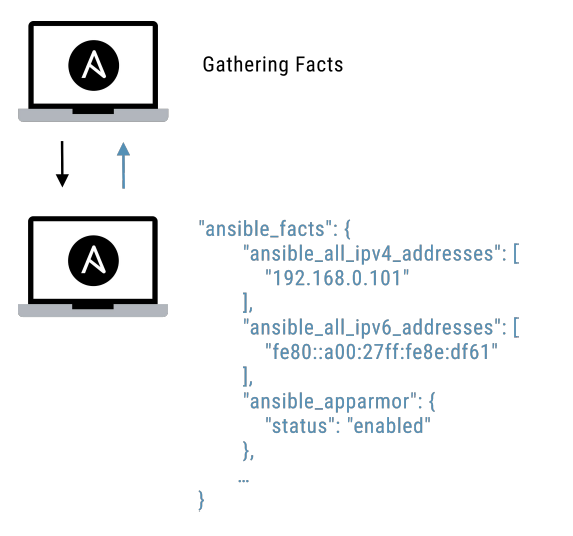  


Find the playbook variables/facts_main.yml:  
```
---
- hosts: localhost
  gather_facts: yes
  vars_prompt:
    - name: user_name
      prompt: "Please enter your user name"
      private: no
  tasks:
    - name: Print some Ansible facts
      debug:
        msg: >
          Hello, {{ user_name }}!
          This container is running on a {{ ansible_architecture }} architecture.
          The operating system is {{ ansible_distribution }} {{ ansible_distribution_version }} ({{ ansible_distribution_release }}).
          The kernel version is {{ ansible_kernel }}.
          The container hostname is {{ ansible_hostname }}.
          The total memory available is {{ ansible_memtotal_mb }} MB, with {{ ansible_memfree_mb }} MB free.
          The system uptime is {{ ansible_uptime_seconds }} seconds.
          The container is running under {{ ansible_virtualization_type }} virtualization.
```  

Now, run the playbook:  

```
ansible-playbook -i hosts variables/facts_main.yml
```  

Be sure to enter your name when prompted.   


## Ansible Variables  

* A variable is a label that can be referred to from anywhere in the playbook, and it can contain different values, referring to anything
* Variable names must start with a letter and can contain letters, underscores and numbers  
* Variables can be defined at different levels: in a playbook, from inventory or included from external files  
* In the playbook, the variable is referred to using double curly braces  
* If the variable is used as the first element to start a value, using double quotes is mandatory  


### Variables on a Playbook  

```
---
- hosts: localhost
  vars:
    user: eduardo
    role: admin
```  

### Variables on Inventory file  

```
[webservers]
web1.example.com
web2.example.com
[webservers:vars]
documentroot=/web
```  

### Variables on Files  


playbook (main.yml):  
```
---
- hosts: all
  vars_files:
    - vars/users.yml
    
  
```
variables file, with path relative to the playbook path:  
```
$ cat vars/users.yml
users:
  - user: eduardo
    role: admin
  - user: jsoe
    role: contributor
```

### group_vars and a host_vars directories  

* host_vars: variables per host  
  * Defined in <ansible_dir>/host_vars/hostname or in <ansible_dir>/<inventory_dir>/host_vars/hostname  
* group_vars: variables per hostgroup  
  * Defined in <ansible_dir>/group_vars/groupname or in <ansible_dir>/<inventory_dir>/group_vars/groupname  
* Created files must match the names of (inventory) hosts and host groups  
* Host variables override group variables  
* Special group-name all: All defined hosts are member of group all  

```
$ cat ~/myproject/host_vars/web1.example.com
package: httpd

$ cat ~/myproject/group_vars/web
documentroot: /web
```  

### items: iterate over lists

```
tasks:
- name: remove services
  yum:
    name: "{{ item }}"
    state: absent
  with_items:
    - httpd
    - vsftpf
```  

## Register  

* The register statement can be used to capture output of a command into a variable  
* Use debug to show the value of the variable  
* While running the playbook, the [debug] section will show the output of the command in the specific task  

```
---
- name: show command output
  host: localhost
  tasks:
    - name: fetch output of the who command
      command: who
      register: currentusers
    - debug: var=currentusers
```  

# Playbooks & Roles  


* Playbooks are expressed in YAML format and have a minimum of syntax  
* Each playbook is composed of one or more "plays" in a list. By composing it this way, it is possible to orchestrate multi-machine deployments  
* Make use of variables and handlers (actions in response to events)  

* **Roles** are ways of automatically loading certain variables, files, tasks, and handlers based on a known file structure  
* Each directory must contain a main.yml file:  
  * **defaults**: default variables for the role  
  * **files**: contains files which can be deployed via this role  
  * **handlers**: contains handlers, which may be used by this role or even anywhere outside this role  
  * **meta**: defines some meta data for this role  
  * **tasks**: contains the main list of tasks to be executed by the role  
  * **templates**: contains templates which can be deployed via this role  
  * **tests**: contains test cases used for testing the functionality of the role  
  * **vars**: other variables for the role  
  
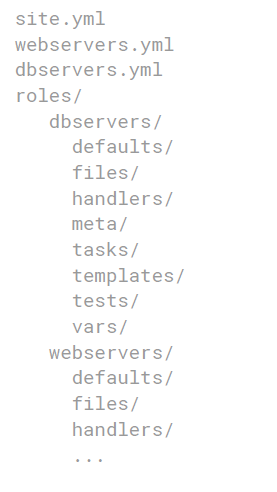  

## Sample Ansible Deployment: Web Server and Database  

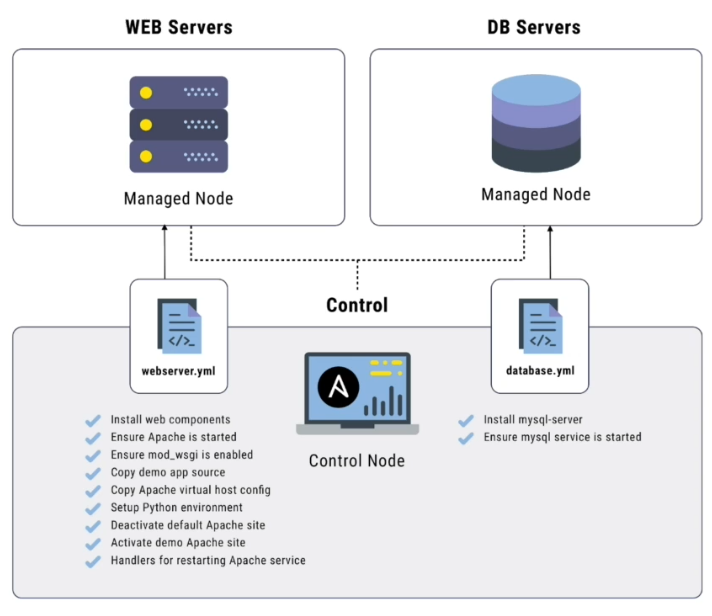  

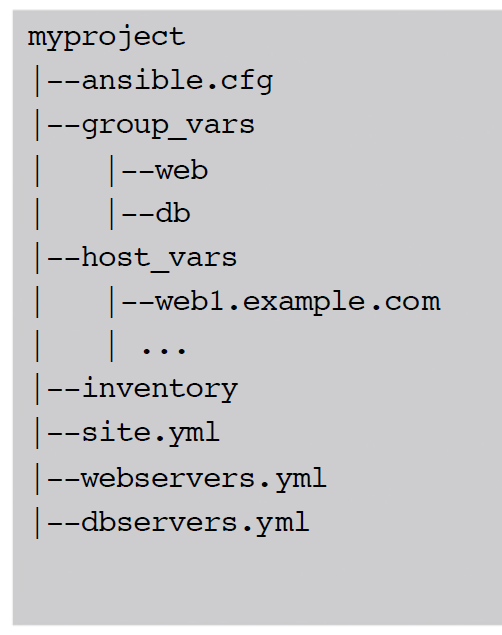  

* See Ansible_Labs/backend  

# (OPTIONAL TOPIC) Templates: Jinja2  

* Ansible uses the [Jinja2](https://jinja.palletsprojects.com/en/3.1.x/) templating engine  
  * Variable substitution  
  * Loops  
  * Comments  
  * Conditionals  
  * Filters  

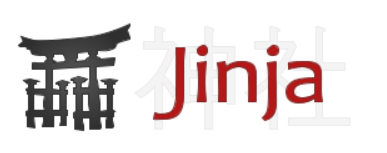  

## Jinja2 Syntax  

* Variable: surround variables with {{ … }}  
> {{ ansible_facts['os_family'] }}  
* Fact: surround fact with {{ … }}  
> {# This is a template comment #}  
* Comment: surround text with {# … #}  
> {{ 'literal {{' }}  
* Escaping: surround text with ' … '  
> {{ 'literal ' + variable }}  
* Concatenation: +  
> {{ 'literal ' + variable }}  

## Jinja2 Filters  

* Mostly separated from the variable with a | symbol  
> {{ variable | mandatory('Error message') }}  
* Require variable to be defined (default, error message is optional)  
> {{ variable | default(10) }}  
* Set default value  
> {{ variable | center(60) }}  
* Center text  
> {{ variable | center(60) | upper }}  
* Chain filters  
> {{ variable | center(60) | upper }}  
* Split string into list (method)  
> {{ string.split(";") }}  
* Join list into a string  
> {{ list | join(", ") }}  

## Jinja2 If Statement  

```
{% if test1 %}
  lines in file
{% elif test2 %}
  lines in file
{% else %}
  lines in file
{% endif %}
```  
* if: test string is equal  
```
{% if string == "teststring" %}
  lines in file if condition is true
{% endif %}
```

* if: test if variable is defined  
```
{% if user is defined %}
  lines in file if condition is true
{% endif %}
```  

* if: whitespace control  
```
{% if user is defined %}
  This is user {{ user -}}
{% endif %}
```  

## Jinja 2 Example  

* See Ansible_Labs/templates
